In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

In [2]:
dataset= pd.read_csv("D:/Besant Technologies/Python_Data_Science/Datasets/diabetes.csv")

In [3]:
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
dataset.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [6]:
X= dataset.iloc[:, [5,7]].values

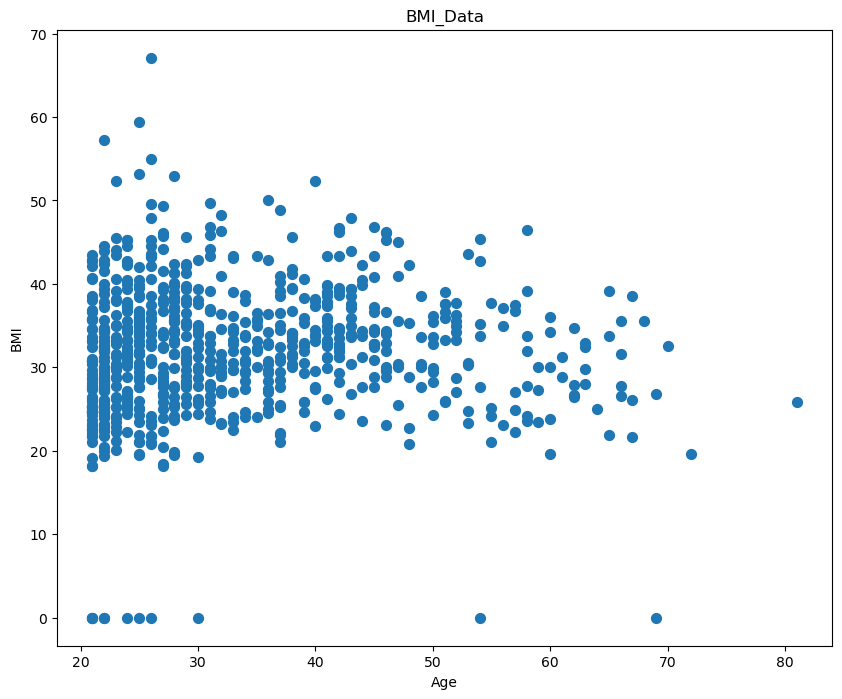

In [9]:
plt.figure(figsize=(10,8))

plt.scatter(X[:, 1], X[:, 0], s=50)

plt.xlabel("Age")

plt.ylabel("BMI")

plt.title("BMI_Data")

plt.show()

In [10]:
from sklearn.cluster import KMeans

In [11]:
wcss= []

for i in range(1, 11):

  kmeans= KMeans(n_clusters= i, init= "k-means++", random_state= 42)

  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

print(wcss)

[153755.14389322908, 76677.11304060816, 56145.570128827, 49063.629003439826, 34889.18054581821, 29005.08501777921, 23850.49179119644, 23907.620419687202, 18767.43873371812, 17681.928529522556]


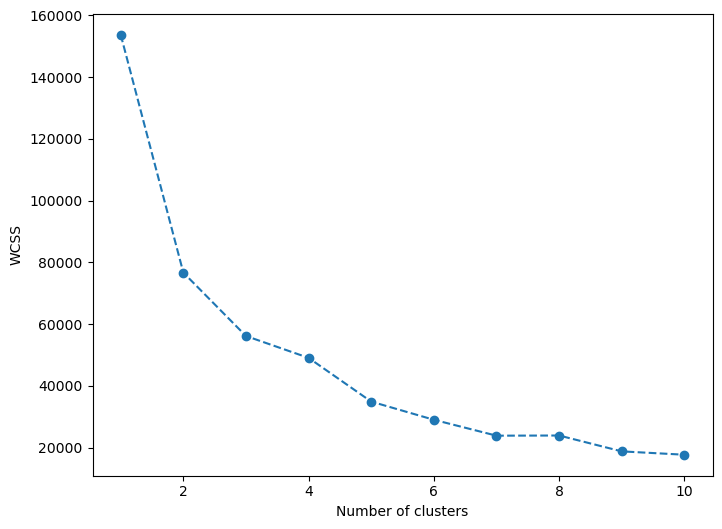

In [12]:
#elbow curve


plt.figure(figsize=(8,6))

plt.plot(range(1,11), wcss, marker= "o", linestyle= "--")

plt.xlabel("Number of clusters")

plt.ylabel("WCSS")

plt.show()

In [13]:
kmeans= KMeans(n_clusters= 9, init= "k-means++", random_state=42)

y_kmeans= kmeans.fit_predict(X)

print(y_kmeans)

[6 1 1 8 0 1 2 2 3 3 2 7 5 5 3 1 0 1 0 1 2 6 7 1 6 7 7 8 5 7 5 2 8 8 3 1 1
 7 2 6 2 7 3 6 1 0 1 8 0 4 8 8 1 5 7 8 7 0 7 0 4 7 1 8 7 1 7 6 8 8 2 8 7 2
 2 8 7 2 0 8 8 4 1 8 0 2 7 2 7 8 8 1 7 5 8 7 2 8 8 0 7 8 8 8 0 8 8 1 2 2 2
 7 2 2 7 5 7 2 8 8 0 2 2 5 2 0 0 2 7 5 1 1 2 7 8 2 2 8 2 2 3 7 2 7 2 4 7 1
 5 8 2 1 7 0 6 0 8 8 8 6 1 7 0 8 1 7 2 1 2 1 1 2 8 0 1 1 7 0 6 7 1 2 8 8 1
 7 5 1 1 2 8 7 1 0 3 0 8 8 2 2 2 0 1 8 6 8 6 6 2 7 8 0 5 0 7 7 2 1 1 7 2 5
 1 5 8 2 2 2 2 0 0 6 8 2 8 0 6 0 1 8 8 2 8 1 2 3 7 0 7 2 7 8 8 2 3 2 1 8 8
 6 1 2 2 5 1 7 2 0 8 8 7 8 1 2 6 0 1 8 5 8 2 7 7 3 3 3 7 0 8 7 2 2 0 0 5 2
 1 2 6 5 2 2 7 0 1 0 3 8 2 2 1 2 8 8 7 2 8 1 2 5 1 2 1 3 2 8 2 7 0 1 3 2 7
 3 8 0 7 7 1 7 8 1 2 1 6 6 8 8 8 7 0 1 7 8 0 3 2 7 6 2 2 5 5 5 2 2 1 8 8 7
 2 4 2 2 2 6 8 2 0 0 2 8 8 8 8 8 1 6 5 2 7 0 8 1 1 8 1 2 8 2 1 3 7 7 7 0 3
 8 1 0 2 2 0 8 2 2 8 7 8 8 0 8 0 2 7 2 4 7 0 7 8 1 8 1 1 0 7 2 8 2 7 2 2 1
 1 0 8 2 2 2 8 8 0 5 2 7 5 2 6 5 3 8 7 1 1 8 8 2 1 0 0 2 2 3 8 5 2 1 1 5 7
 2 8 2 0 0 0 6 8 5 2 7 1 

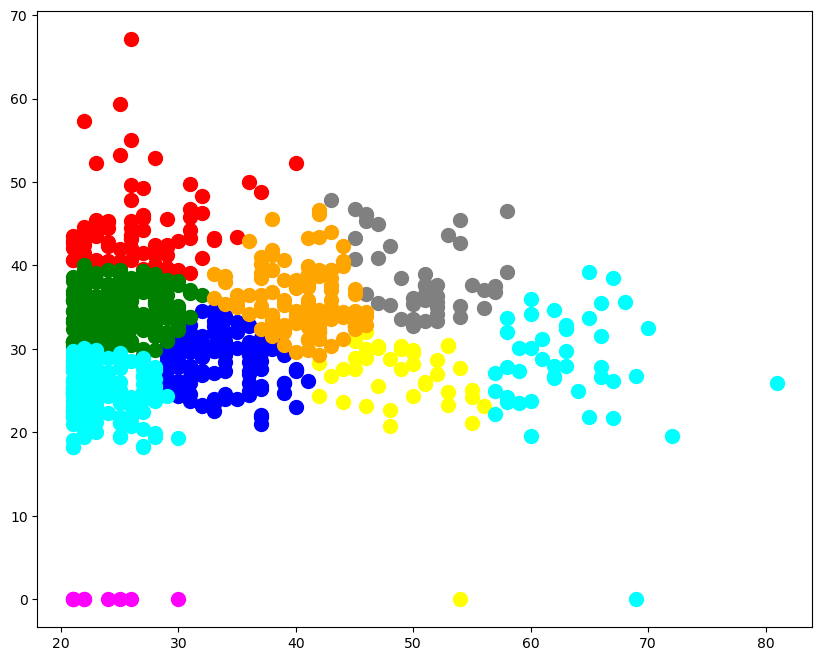

In [18]:
plt.figure(figsize= (10,8))

plt.scatter(X[y_kmeans==0,1], X[y_kmeans==0,0], s=100, c= "red", label= "Cluster 1")

plt.scatter(X[y_kmeans==1, 1], X[y_kmeans==1, 0], s=100, c= "blue", label= "Cluster 2")

plt.scatter(X[y_kmeans==2, 1], X[y_kmeans==2, 0], s=100, c= "green", label= "Cluster 3")

plt.scatter(X[y_kmeans==3, 1], X[y_kmeans==3, 0], s=100, c= "yellow", label= "Cluster 4")

plt.scatter(X[y_kmeans==4, 1], X[y_kmeans==4, 0], s=100, c= "magenta", label= "Cluster 5")
plt.scatter(X[y_kmeans==5, 1], X[y_kmeans==5, 0], s=100, c= "cyan", label= "Cluster 6")
plt.scatter(X[y_kmeans==6, 1], X[y_kmeans==6, 0], s=100, c= "grey", label= "Cluster 7")
plt.scatter(X[y_kmeans==7, 1], X[y_kmeans==7, 0], s=100, c= "orange", label= "Cluster 8")
plt.scatter(X[y_kmeans==8, 1], X[y_kmeans==8, 0], s=100, c= "aqua", label= "Cluster 9")


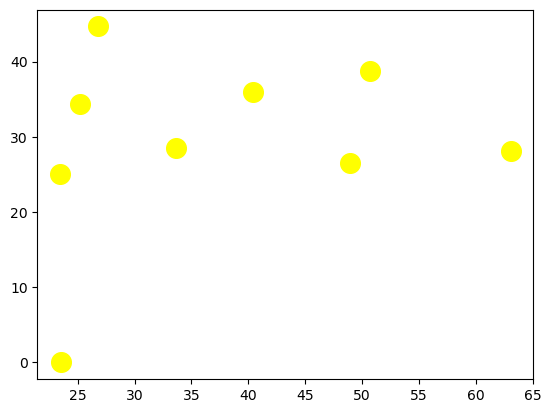

In [17]:
plt.scatter(kmeans.cluster_centers_[:, 1],
            kmeans.cluster_centers_[:, 0],
            s= 200, c="yellow", label= "Centroids")


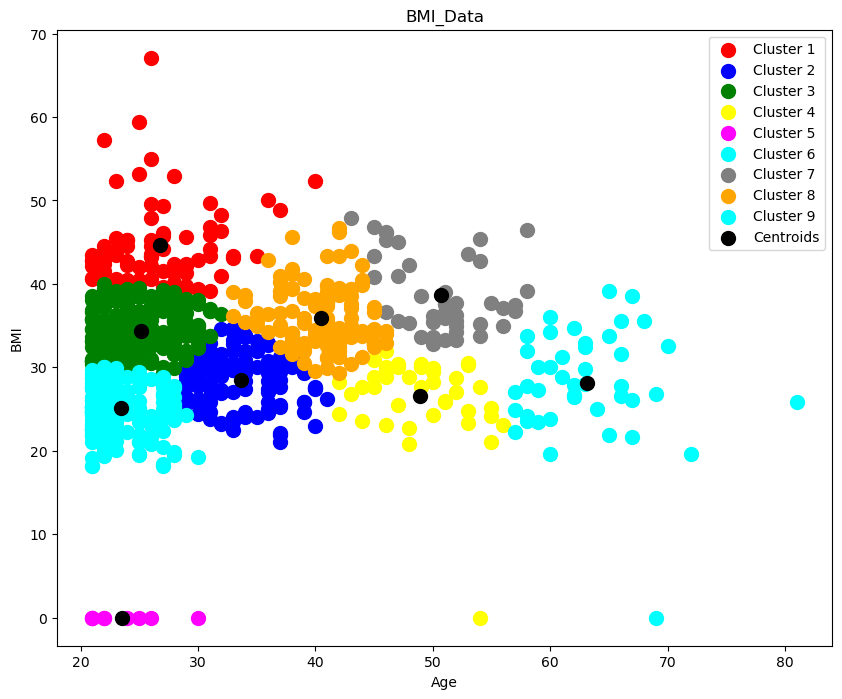

In [22]:
plt.figure(figsize= (10,8))

plt.scatter(X[y_kmeans==0,1], X[y_kmeans==0,0], s=100, c= "red", label= "Cluster 1")

plt.scatter(X[y_kmeans==1, 1], X[y_kmeans==1, 0], s=100, c= "blue", label= "Cluster 2")

plt.scatter(X[y_kmeans==2, 1], X[y_kmeans==2, 0], s=100, c= "green", label= "Cluster 3")

plt.scatter(X[y_kmeans==3, 1], X[y_kmeans==3, 0], s=100, c= "yellow", label= "Cluster 4")

plt.scatter(X[y_kmeans==4, 1], X[y_kmeans==4, 0], s=100, c= "magenta", label= "Cluster 5")
plt.scatter(X[y_kmeans==5, 1], X[y_kmeans==5, 0], s=100, c= "cyan", label= "Cluster 6")
plt.scatter(X[y_kmeans==6, 1], X[y_kmeans==6, 0], s=100, c= "grey", label= "Cluster 7")
plt.scatter(X[y_kmeans==7, 1], X[y_kmeans==7, 0], s=100, c= "orange", label= "Cluster 8")
plt.scatter(X[y_kmeans==8, 1], X[y_kmeans==8, 0], s=100, c= "aqua", label= "Cluster 9")

plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], s=100, c='black', label='Centroids')

plt.title("BMI_Data")

plt.xlabel("Age")

plt.ylabel("BMI")

plt.legend()

plt.show()